<a href="https://colab.research.google.com/github/ddhch/AIclass/blob/main/20192177%EC%B5%9C%EB%8B%A4%ED%98%84_%EA%B3%BC%EC%A0%9C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11.1

In [ ]:
"""
차원 축소를 통해 차원의 저주 때문에 발생하는 어떤 문제들을 해소할 수 있는가. 차원 축소 과정에서 감수해야 하는 단점은 무엇인가

해소할 수 있는 문제
- 변수의 수가 많아지면 차원이 커지므로 분석을 위한 최소한의 필요 데이터 건수도 많아진다. 
 충분히 공간을 표현할 만큼  큰 데이터 수집 없이, 적은 데이터로만 이 공간을 표현하는 경우 과적합이 발생
- 같은 데이터지만 차원이 증가할 수록 데이터 간 거리가 멀어진다. 차원이 증가하면서 빈 공간이 생기는데, 정보가 없는 공간이기 때문에 빈 공간이 많을수록 학습 시켰을 때 모델 성능이 저하된다.
- 비슷한 특징을 지니는 패턴이나 클러스터를 찾기 어려워진다.
- KNN을 사용하는 경우 차원의 저주 문제에 치명적이다. 차원이 커질 수록 주변 이웃들이 멀어지니 예측에 사용할 포인트 값이 한참 떨어져 있어 모델 성능도 나빠지고 설명력도 좋지 않게 된다.

차원 축소 단점
- 정보 손실이 발생한다
- 원본 데이터 대비 차원 축소한 데이터를 해석하는데도 어려움이 생긴다.
- 차원 축소를 위한 데이터 변환 절차가 추가되므로 데이터 파이프 라인이 복잡해진다.
"""

# 11.2

In [ ]:
"""주성분 분석을 통해 차원 축소를 할 경우 한계는 무엇인가?

한계
- 기존 데이터 벡터를 선형 변환하여 projection 하는 것이므로, 비선형 데이터 분포에 대해 적합하지 않다.
- 데이터의 분포가 가장 크게 되는 벡터를 찾는 것인데, 분포가 가장 커지는 벡터가 찾는 데이터의 특성을 항상 잘 표현한다고 할 수 없으며, 해당 축에 대한 의미를 분석하는 것도 어렵다.
- 라벨링된 데이터 클래스간의 관계를 표현하기 힘들다.
"""

# 11.3

In [ ]:
"""매니폴드 학습에 사용하는 다양한 종류의 알고리즘을 조사하고 장단점을 비교해 보라
- Isometric feature mapping(Isomap)
: Isomap은 각 데이터 포인트를 가장 가까운 이웃과 연결하는 식의 그래프를 만든 후 그래프에서 두 노드 사이의 최단 경로를 이루는 노드의 수인  geodesic distance를 유지 하면서 차원을 축소한다.
장점
1. PCA와 MDS의 특징을 결합하여 모든 점 사이의 측지선 거리를 유지하는 더 낮은 차원의 임베딩을 추구한다.
2. 이해와 구현이 용이함
3. Preserves "true" realtionship between data points

단점
1. 계산 비용이 많이 든다.
2. Known to have difficulties with "holes"

- Locally Linear Embedding(LLE)
:LLE는 머신러닝 알고리즘 중 Unsupervised Learning에 해당하며, 서로 인접한 데이터들을 보존(neighborhood-preserving)하면서 고차원인 데이터셋을 저차원으로 축소하는 방법이다. 
즉, LLE는 입력 데이터셋을 낮은 차원의 단일 글로벌 좌표계(single global coordinate system)으로 매핑하는 알고리즘이다.
장점
1. 사용하기에 간단하다.
2. 최적화가 국소최소점으로 가지 않는다.
3. 비선형 임베딩 생성이 가능하다.
4. 고차원의 데이터를 저차원의 데이터로 매핑이 가능하다.
단점
1. 대용량의 데이터셋에 적용하기는 어려운 점이 있다.

- t-distributed stochastic neighbor embedding(t-SNE)
: t-SNE는 비슷한 데이터는 가까이, 비슷하지 않은 데이터는 멀리 떨어지도록 차원을 축소한다. 주로 시각화에 많이 사용되며, 특히 고차원 공간에 있는 데이터의 군집을 시각화할 때 사용한다.
장점
1. 탐색전 데이터 분석에 유용, 지도학습에는 거의 사용하지 않음
2. 데이터 포인트를 2차원 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리떨어진 포인트는 멀어지게 만드는 것
3. 이웃 데이터 포인트에 대한 정보를 보전하려고함.
단점
1. 일반적인 차원 축소 작업에서 분병하지 않음
2. 상대적으로 지역적인 성질으로 차원의 저주에 민감
3. 비용 함수가 전역 최적값으로 수렴된다는 보장이 없음"""

# 11.5

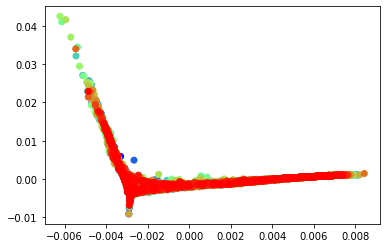

In [9]:
"""주성분 분석을 이용하여 MNIST를 50차원 정도로 압축한 뒤에,  LLE를 적용하여 2차원으로 추가 차원 축소를 해 보라"""
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # color 데이터 생성    
    X = []
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

X, color = make_a_roll(60000)

# 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분해 받자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                                fashion_mnist.load_data()

#50차원으로 압축
from sklearn.decomposition import PCA
train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 50)

train_reduced = pca.fit_transform(train_images_flat)

from sklearn import manifold
#LLE 적용시켜 2차원 추가 차원 축소
embeddings = {} 
embeddings['LLE'] = manifold.LocallyLinearEmbedding(n_neighbors=10,
                                                 n_components=2).fit_transform(train_reduced)


plt.scatter(embeddings['LLE'][:, 0], embeddings['LLE'][:,1], c=color, cmap=plt.cm.hot)

# 12.1

In [ ]:
"""오토인코더가 만들어내는 잠재 표현을 이용하여 할 수 있는 응용에 대해 생각해 보라
이미지 구조를 파악하는데 좋기 때문에 
1. 기존의 이미지를 변환하는데 쓰일 수 있다.
2. 이미지의 해상도 높이고 재건하기
3. 이미지 복원
4. 비정상 거래 검출
5. 데이터 시각화, 복원
6. 의미 추출
7. 이미지 검색
"""

# 12.4

In [ ]:
"""자신만의 오토인코더를 만들어 MNIST 손글씨 데이터를 할용하여 3이라는 숫자를 표현하는 데이터들의 잠재 표현을 추출해보라"""
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalization
x_train = x_train.astype(np.float32)/255.
x_test = x_test.astype(np.float32)/255.
# flatten
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))
 
print(x_train_flatten.shape)
print(x_test_flatten.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [ ]:
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)),
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(100, activation='elu')])
enc_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               921700    
                                                                 
Total params: 924,180
Trainable params: 924,180
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(100, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9216)              930816    
                                                                 
 reshape_1 (Reshape)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 26, 26, 16)       2320      
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 933,281
Trainable params: 933,281
Non-trainable params: 0
_________________________________________________________________


Epoch 1/3
1875/1875 [==============================] - 167s 88ms/step - loss: 0.0093
Epoch 2/3
1875/1875 [==============================] - 166s 89ms/step - loss: 0.0039
Epoch 3/3
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0030


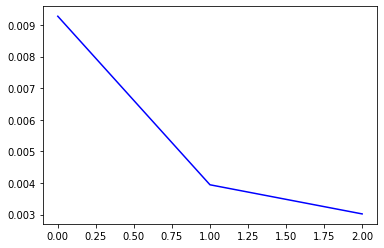

In [ ]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = x_train.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 3)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

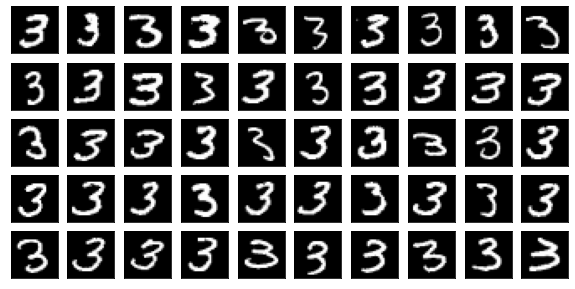

In [ ]:
three_idx = y_train == 3    # 클래스 번호는 3
three_array = x_train[three_idx]
plot_images(5, 10, three_array.reshape(-1, 28, 28))

(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

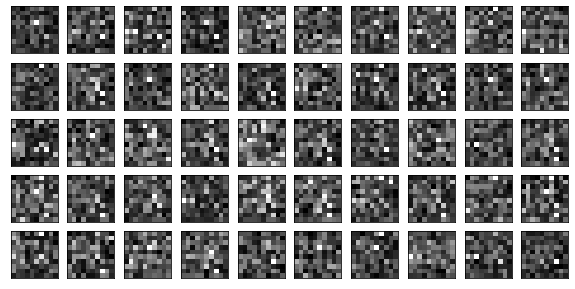

In [ ]:
print(x_train.shape)
three_array = three_array.reshape(-1,28,28, 1)
three_encoded = enc_cnn.predict(three_array)
plot_images(5, 10, three_encoded.reshape(-1, 10, 10))

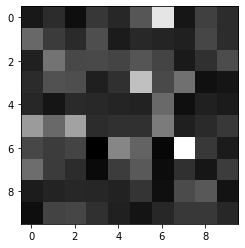

In [ ]:
three_latent = three_encoded.mean(axis = 0)
plt.imshow(three_latent.reshape(10,10), cmap='gray')

In [ ]:
three_latent_augmented = []
for _ in range(50):
    # 잠재 표현에 잡음 추가
    new_three = three_latent*(1+np.random.randn(100)*0.3)
    three_latent_augmented.append(new_three)  # 잡음 추가된 데이터를 리스트화
# 변형된 잠재 표현의 리스트를 넘파이 배열로 바꾼다.
three_latent_augmented = np.array(three_latent_augmented)

<Figure size 432x288 with 0 Axes>

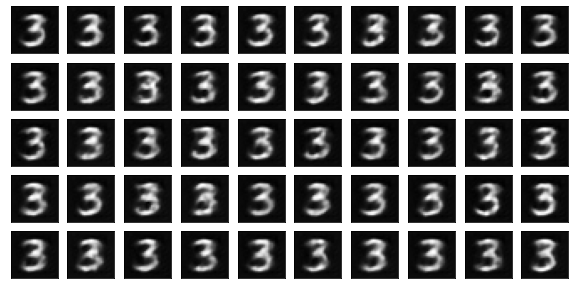

In [ ]:
three_generated = dec_cnn.predict([three_latent_augmented])
plot_images(5, 10, three_generated.reshape(-1, 28, 28))